Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
# import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from skimage import io
from skimage.transform import resize

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
base_path= "C:/Users/tsrni/Desktop/nihar/learning/machine_learning/upgrad course/datasets/Melanoma/ISIC_Data"
data_dir_train = pathlib.Path(f"{base_path}/Train")
data_dir_test = pathlib.Path(f"{base_path}/Test")
print(data_dir_train)


C:\Users\tsrni\Desktop\nihar\learning\machine_learning\upgrad course\datasets\Melanoma\ISIC_Data\Train


In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = keras.utils.image_dataset_from_directory(data_dir_train,
                                                    labels = "inferred", #Labels are generated from the directory structure. The classnames are created
                                                           #in alpahbetic order
                                                    image_size=(img_height,img_width),
                                                    batch_size=batch_size,
                                                    seed = 123,  
                                                   )

Found 2239 files belonging to 9 classes.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = keras.utils.image_dataset_from_directory(data_dir_test,
                                                    labels = "inferred", #Labels are generated from the directory structure. The classnames are created
                                                           #in alpahbetic order
                                                    image_size=(img_height,img_width),
                                                    batch_size=batch_size,
                                                    seed = 123,  
                                                   )

Found 118 files belonging to 9 classes.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

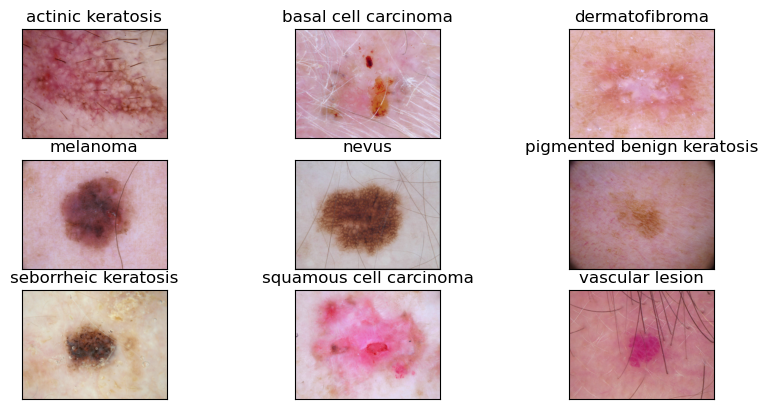

In [10]:
# plt.tick_params(left = False,right=False)
f, axes = plt.subplots(3, 3, sharey=True)
f.set_figwidth(10)
# f.tick_params(left = False)


# print(axes)

for ii in range(len(class_names)):
    re = class_names[ii]+'/*.jpg'
    sample_img_path = list(data_dir_train.glob(re))[0] #picking the first image in the folder
    img = io.imread(sample_img_path)
    img = resize(img,(450,600))
    kk = ii//3
    jj = ii%3
    # print(img.shape)
    axes[kk][jj].set_xticks([])
    axes[kk][jj].set_yticks([])
    axes[kk][jj].imshow(img)
    axes[kk][jj].set_title(class_names[ii])

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [75]:
### Your code goes here

num_classes = len(class_names)


model = keras.Sequential(
    [
        layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(32,(2,2),padding = "same",activation = "relu"), #output 180X180X32
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size = (2,2)), #output 90X90X32
        # layers.Dropout(0.2),

        layers.Conv2D(64,(2,2),padding = "same",activation = "relu"), #output 90X90X64
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size = (2,2)), #output 45X45X64
        # layers.Dropout(0.2),

        layers.Conv2D(128,(2,2),padding = "same",activation = "relu"), #output 45X45X128
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size = (2,2)), #output 22X22X128

        layers.Dropout(0.2),

        layers.Flatten(),

        layers.Dense(128,activation = "relu"),
        layers.Dropout(0.2),

        layers.Dense(num_classes,activation="softmax")
    ]
)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [76]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="adam",
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

In [77]:
# View the summary of all layers
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 32)      416       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 64)        8256      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 45, 45, 128)     

### Train the model

In [78]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 51s 709ms/step - loss: 2.1103 - accuracy: 0.2367 - val_loss: 2.1523 - val_accuracy: 0.2288
Epoch 2/20
70/70 [==============================] - 52s 740ms/step - loss: 1.7405 - accuracy: 0.3747 - val_loss: 2.2485 - val_accuracy: 0.2034
Epoch 3/20
70/70 [==============================] - 47s 674ms/step - loss: 1.5296 - accuracy: 0.4703 - val_loss: 2.4435 - val_accuracy: 0.3644
Epoch 4/20
70/70 [==============================] - 48s 684ms/step - loss: 1.4385 - accuracy: 0.4993 - val_loss: 2.4456 - val_accuracy: 0.3475
Epoch 5/20
70/70 [==============================] - 46s 658ms/step - loss: 1.3055 - accuracy: 0.5409 - val_loss: 2.0194 - val_accuracy: 0.3390
Epoch 6/20
70/70 [==============================] - 45s 648ms/step - loss: 1.2073 - accuracy: 0.5770 - val_loss: 2.4086 - val_accuracy: 0.3475
Epoch 7/20
70/70 [==============================] - 45s 643ms/step - loss: 1.1151 - accuracy: 0.6038 - val_loss: 2.4115 - val_accuracy: 0.2966

### Visualizing training results

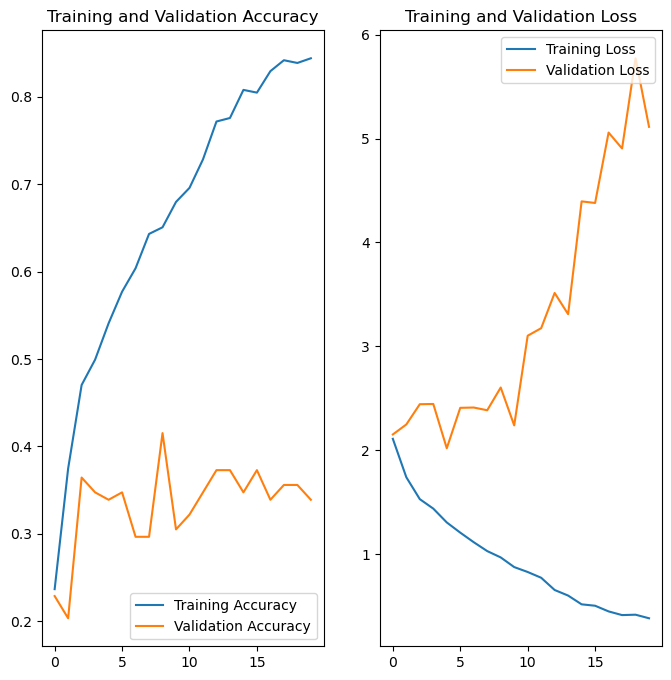

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
Observations:
- The model is heavily overfitting. We can see that upto around 35% accuracy the models go hand in hand but afterwards they just go their own ways

Action items:
- Add Dropouts after initial convolution layers as well
- do - Data augmentation - Image rotation, Image flip, Image zoom

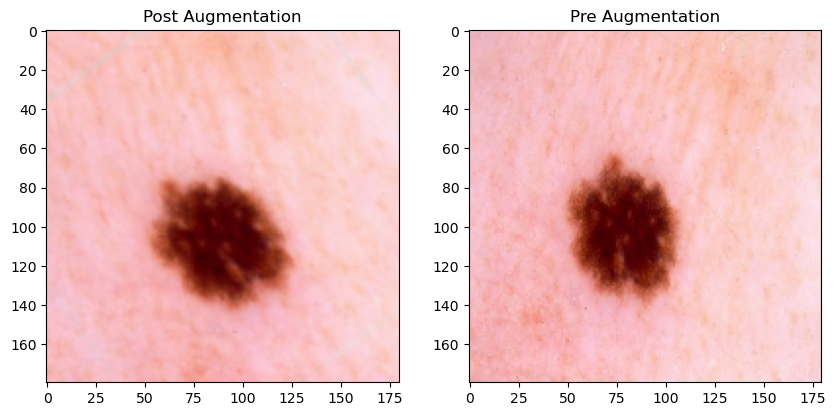

In [11]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    augmented_images = data_augmentation(images,training=True)
    ax = plt.subplot(1, 2, 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.title("Post Augmentation")
    ax = plt.subplot(1, 2, 2)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title("Pre Augmentation")

    # plt.axis("off")


### Todo:
### Create the model, compile and train the model


In [71]:
### Your code goes here

num_classes = len(class_names)


model = keras.Sequential(
    [
        data_augmentation,
        layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(32,(2,2),padding = "same",activation = "relu"), #output 180X180X32
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size = (2,2)), #output 90X90X32
        layers.Dropout(0.2),

        layers.Conv2D(64,(2,2),padding = "same",activation = "relu"), #output 90X90X64
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size = (2,2)), #output 45X45X64
        layers.Dropout(0.2),

        layers.Conv2D(128,(2,2),padding = "same",activation = "relu"), #output 45X45X128
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size = (2,2)), #output 22X22X128
        layers.Dropout(0.2),

        layers.Flatten(),

        layers.Dense(128,activation = "relu"),
        layers.Dropout(0.2),

        layers.Dense(num_classes,activation="softmax")
    ]
)



### Compiling the model

In [72]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="adam",
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

### Training the model

In [73]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 [==============================] - 79s 1s/step - loss: 2.3130 - accuracy: 0.2206 - val_loss: 2.1366 - val_accuracy: 0.2627
Epoch 2/20
70/70 [==============================] - 82s 1s/step - loss: 1.8193 - accuracy: 0.3542 - val_loss: 2.1440 - val_accuracy: 0.1780
Epoch 3/20
70/70 [==============================] - 83s 1s/step - loss: 1.6779 - accuracy: 0.4069 - val_loss: 2.0385 - val_accuracy: 0.2797
Epoch 4/20
70/70 [==============================] - 83s 1s/step - loss: 1.5900 - accuracy: 0.4426 - val_loss: 1.9982 - val_accuracy: 0.2966
Epoch 5/20
70/70 [==============================] - 75s 1s/step - loss: 1.5212 - accuracy: 0.4703 - val_loss: 1.9573 - val_accuracy: 0.2797
Epoch 6/20
70/70 [==============================] - 67s 957ms/step - loss: 1.4755 - accuracy: 0.4801 - val_loss: 1.8847 - val_accuracy: 0.3390
Epoch 7/20
70/70 [==============================] - 67s 959ms/step - loss: 1.4211 - accuracy: 0.5020 - val_loss: 1.9510 - val_accuracy: 0.3051
Epoch 8/20
70/

### Visualizing the results

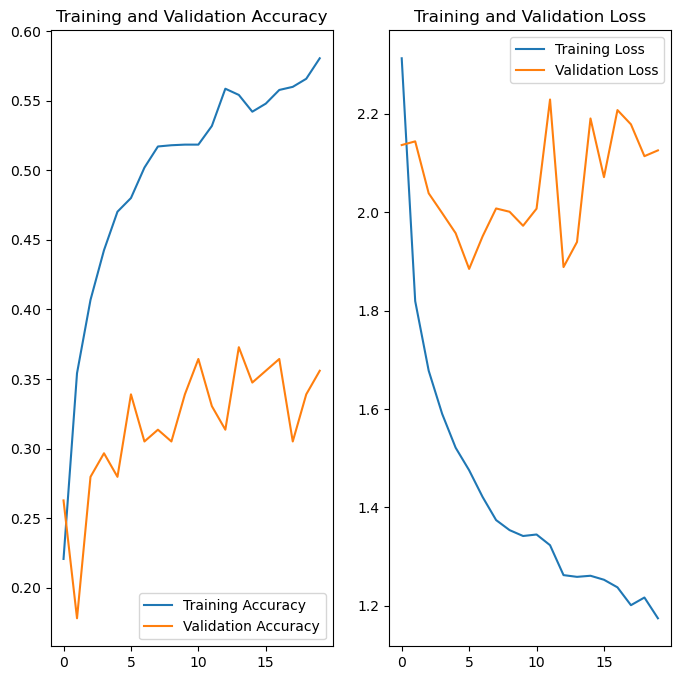

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
1. We can see that though the accuracy hasn't improved greatly, overfitting has reduced
2. reasons could be image Augmentation, class imbalance
3. to reduce the overfitting further we could use batch normalization

Points 2 and 3 can be addressed using Image Augmentation

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [138]:
label_data = []
for _ , batch_labels in train_ds:
    label_data.extend(batch_labels.numpy())

y_train = np.array(label_data)

df = pd.DataFrame(y_train, columns = ["labels"]).labels.value_counts()
df.index = class_names

orig_df= pd.DataFrame({"label":df.index, "counts":df.values})
print(orig_df)

                        label  counts
0           actinic keratosis     462
1        basal cell carcinoma     438
2              dermatofibroma     376
3                    melanoma     357
4                       nevus     181
5  pigmented benign keratosis     139
6        seborrheic keratosis     114
7     squamous cell carcinoma      95
8             vascular lesion      77


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
Vascular lesion has the least number of labels
#### - Which classes dominate the data in terms proportionate number of samples?
We can see that the classes - actinic keratosis (462),
basal cell carcinom ( 43), 
dermatofibro (  3), 6
melan (   ) account for about 80% of the class labels. let's fix this using Augmentor package in python357

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [183]:
path_to_training_dataset= data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) +"/"+ str(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    # p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
    # p.flip_top_bottom(0.5)
    # p.flip_left_right(probability=0.5)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\tsrni\Desktop\nihar\learning\machine_learning\upgrad course\datasets\Melanoma\ISIC_Data\Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20CB1E0B4C0>: 100%|█| 500/500 [00:06<00:00, 77.97 Sam


Initialised with 376 image(s) found.
Output directory set to C:\Users\tsrni\Desktop\nihar\learning\machine_learning\upgrad course\datasets\Melanoma\ISIC_Data\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20CB1E25930>: 100%|████████████| 500/500 [00:07<00:00, 66.02 Samples/s]


Initialised with 95 image(s) found.
Output directory set to C:\Users\tsrni\Desktop\nihar\learning\machine_learning\upgrad course\datasets\Melanoma\ISIC_Data\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20CB185B220>: 100%|████████████| 500/500 [00:08<00:00, 58.23 Samples/s]


Initialised with 438 image(s) found.
Output directory set to C:\Users\tsrni\Desktop\nihar\learning\machine_learning\upgrad course\datasets\Melanoma\ISIC_Data\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x20CB1615240>: 100%|███████████| 500/500 [00:43<00:00, 11.55 Samples/s]


Initialised with 357 image(s) found.
Output directory set to C:\Users\tsrni\Desktop\nihar\learning\machine_learning\upgrad course\datasets\Melanoma\ISIC_Data\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x20CBC007910>: 100%|██████████| 500/500 [00:50<00:00,  9.98 Samples/s]


Initialised with 462 image(s) found.
Output directory set to C:\Users\tsrni\Desktop\nihar\learning\machine_learning\upgrad course\datasets\Melanoma\ISIC_Data\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20CB1DE9C30>: 100%|████████████| 500/500 [00:13<00:00, 36.93 Samples/s]


Initialised with 77 image(s) found.
Output directory set to C:\Users\tsrni\Desktop\nihar\learning\machine_learning\upgrad course\datasets\Melanoma\ISIC_Data\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x20D49B20640>: 100%|███████████| 500/500 [00:31<00:00, 16.03 Samples/s]


Initialised with 181 image(s) found.
Output directory set to C:\Users\tsrni\Desktop\nihar\learning\machine_learning\upgrad course\datasets\Melanoma\ISIC_Data\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20D4A937EE0>: 100%|████████████| 500/500 [00:09<00:00, 52.91 Samples/s]


Initialised with 139 image(s) found.
Output directory set to C:\Users\tsrni\Desktop\nihar\learning\machine_learning\upgrad course\datasets\Melanoma\ISIC_Data\Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20CB1BA9240>: 100%|█| 500/500 [00:09<00:00, 54.62 Sam


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [184]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [185]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(f"Number of the paths {len(path_list)}")

lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(f"Number of new lesions {len(lesion_list)}")

dataframe_dict_new = dict(zip(path_list,lesion_list))
print(f"number of items in the dict {len(dataframe_dict_new)}")

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2.shape

augmented_series = df2['Label'].value_counts()
aug_df= pd.DataFrame({"label":augmented_series.index, "counts":augmented_series.values})
print(aug_df)

Number of the paths 4500
Number of new lesions 4500
number of items in the dict 4500
                        label  counts
0           actinic keratosis     500
1        basal cell carcinoma     500
2              dermatofibroma     500
3                    melanoma     500
4                       nevus     500
5  pigmented benign keratosis     500
6        seborrheic keratosis     500
7     squamous cell carcinoma     500
8             vascular lesion     500


In [186]:
#ESTIMATING FINAL COUNTS AFTER DATA AUGMENTATION

final_df = pd.concat([orig_df,aug_df],ignore_index=True)
grouped_df = final_df.groupby('label')['counts'].sum()
print("FINAL COUNTS AFTER DATA AUGMENTATION")
print(grouped_df)

FINAL COUNTS AFTER DATA AUGMENTATION
label
actinic keratosis             962
basal cell carcinoma          938
dermatofibroma                876
melanoma                      857
nevus                         681
pigmented benign keratosis    639
seborrheic keratosis          614
squamous cell carcinoma       595
vascular lesion               577
Name: counts, dtype: int64


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [187]:
batch_size = 80
img_height = 180
img_width = 180

#### **Todo:** Create training and Validation datasets in one step

- Note that now we have luxury to set aside validation dataset as we have enough samples

In [188]:

train_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "both",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Using 1347 files for validation.


In [189]:
### Your code goes here

num_classes = len(class_names)


model = keras.Sequential(
    [
        # data_augmentation,
        layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
        layers.Conv2D(32,(2,2),padding = "same",activation = "relu"), #output 180X180X32
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size = (2,2)), #output 90X90X32
        # layers.Dropout(0.2),

        layers.Conv2D(64,(2,2),padding = "same",activation = "relu"), #output 90X90X64
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size = (2,2)), #output 45X45X64
        # layers.Dropout(0.2),

        layers.Conv2D(128,(2,2),padding = "same",activation = "relu"), #output 45X45X128
        # layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size = (2,2)), #output 22X22X128

        layers.Dropout(0.5),

        layers.Flatten(),

        layers.Dense(128,activation = "relu"),
        # layers.BatchNormalization(),
        layers.Dropout(0.25),

        layers.Dense(num_classes,activation="softmax")
    ]
)



### Compiling the model

In [190]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="adam",
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

### Training the model

In [191]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
68/68 [==============================] - 153s 2s/step - loss: 2.0184 - accuracy: 0.2522 - val_loss: 1.5588 - val_accuracy: 0.4120
Epoch 2/20
68/68 [==============================] - 175s 3s/step - loss: 1.5026 - accuracy: 0.4332 - val_loss: 1.3733 - val_accuracy: 0.4952
Epoch 3/20
68/68 [==============================] - 157s 2s/step - loss: 1.3495 - accuracy: 0.4894 - val_loss: 1.2020 - val_accuracy: 0.5375
Epoch 4/20
68/68 [==============================] - 139s 2s/step - loss: 1.1776 - accuracy: 0.5710 - val_loss: 1.1123 - val_accuracy: 0.5961
Epoch 5/20
68/68 [==============================] - 143s 2s/step - loss: 1.0968 - accuracy: 0.5944 - val_loss: 1.0713 - val_accuracy: 0.6132
Epoch 6/20
68/68 [==============================] - 144s 2s/step - loss: 0.9638 - accuracy: 0.6497 - val_loss: 1.0408 - val_accuracy: 0.6266
Epoch 7/20
68/68 [==============================] - 133s 2s/step - loss: 0.8407 - accuracy: 0.6981 - val_loss: 0.8973 - val_accuracy: 0.6852
Epoch 8/20
68

#### **Todo:**  Visualize the model results

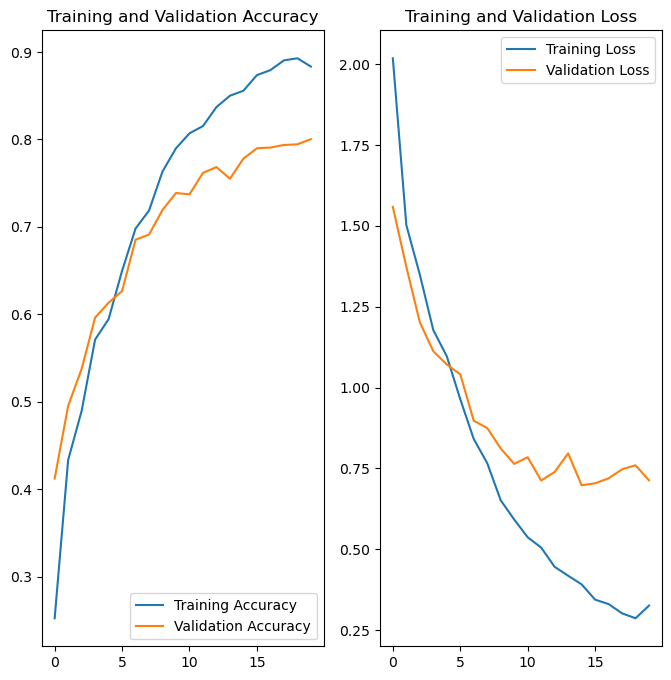

In [192]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



1 - Class imbalacing helped a great deal. The accuracies shot up </br>
2 - We can see that Validation error is reducing with increasing epochs </br>
3 - Adding Dropout at one single place instead of multiple places as well</br>